# NAM Assignment 1 - Analysis of Kane and Abel

## Team Members

In [1]:
# Team Members
## 1. Aaditya S Goel - PES1UG20CS001
## 2. Pooshpal Baheti - PES1UG20CS283
## 3. Prateek Pangal Rao - PES1UG20CS303
## 4. Rahul Ramesh - PES1UG20CS319

## Standard Imports

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from nltk.tokenize import sent_tokenize

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prateekrao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
file = open("KaneAndAbel.txt", "r", encoding='utf-8')
data = file.read()

## 1. Implementation

### a. List of Characters

In [5]:
characters = [
    "William_Kane", "Anne_Kane", "Henry_Osborne", "Matthew_Lester", "Abel_Rosnovski", "Florcia_Koskiewicz",
    "Davis_Leroy", "George_Novak", "Zaphia", "Florentyna_Rosnovski", "Richard_Kane", "Baron_Rosnovski", "Helenda_Koskiewicz",
    'Alan_Lloyd', 'Desmond_Pacey', "Grandmother_Kane", "Grandmother_Cabot", "Tony_Simmons", "Melanie_Leroy",
    "Leon_Koskiewicz", "David_Maxton", "Charles_Lester", "Peter_Parfitt", 'Richie_Kane_Sr'
]

In [6]:
print(len(characters))

24


Pre-processing to replace characters with tokens

In [65]:
##William Kane
# data = data.replace("William Kane", "William_Kane")
data = data.replace("William", "William_Kane")

##Grandmother_Kane
data = data.replace("Grandmother Kane", "Grandmother_Kane")

##Grandmother Cabot
data = data.replace("Grandmother Cabot", "Grandmother_Cabot")

##Peter Parfitt
data = data.replace("Parfitt", "Peter_Parfitt")
data = data.replace("Parfitts", "Peter_Parfitt")

##Tony Simmons
data = data.replace("Tony", "Tony_Simmons")

##Melanie_Leroy
data = data.replace("Melanie", "Melanie_Leroy")

##David Maxton
data = data.replace("Maxton", "David_Maxton")

##Charles Lester
data = data.replace("Charles", "Charles_Lester")

##Richard Kane Sr.
data = data.replace("Richie", "Richie_Kane_Sr")

##Baron Rosnovski
data = data.replace("Baron Rosnovski", "Baron_Rosnovski")

##Anne Kane
data = data.replace("Anne", "Anne_Kane")
# data = data.replace("Anne Kane", "Anne_Kane")

##Henry Osborne
data = data.replace("Henry", "Henry_Osborne")
# data = data.replace("Henry Osborne", "Henry_Osborne")
data = data.replace("Mr. Osborne", "Henry_Osborne")
data = data.replace("Congressman Osborne", "Henry_Osborne")

#Alan Lloyd
data=data.replace('Alan', 'Alan_Lloyd')

#Desmond Pacey
data=data.replace('Desmond', 'Desmond_Pacey')
data=data.replace('Pacey', 'Desmond_Pacey')

##Matthew Lester
data = data.replace("Matthew", "Matthew_Lester")
# data = data.replace("Matthew Lester", "Matthew_Lester")

##Charles Lester
data = data.replace("Charles", "Charles_Lester")


##Abel Rosnovski
data = data.replace("Abel", "Abel_Rosnovski")
# data = data.replace("Abel Rosnovski", "Abel_Rosnovski")
# data = data.replace("Baron Abel Rosnovski", "Abel_Rosnovski")
data = data.replace("Wladek", "Abel_Rosnovski")
# data = data.replace("Wladek Koskiewicz", "Abel_Rosnovski")

##Florcia_Koskiewicz
data = data.replace("Florcia", "Florcia_Koskiewicz")
# data = data.replace("Florcia Koskiewicz", "Florcia_Koskiewicz")

##Davis Elroy
data = data.replace("Davis", "Davis_Leroy")
# data = data.replace("Leroy", "Davis_Leroy")
# data = data.replace("Davis Elroy", "Davis_Elroy")

##Helenda Koskiewicz
data=data.replace('Helena Koskiewicz', 'Helena_Koskiewicz')
data=data.replace('Helena', 'Helena_Koskiewicz')

##George Novak
data = data.replace("George", "George_Novak")
# data = data.replace("George Novak", "George_Novak")
data = data.replace("Novak", "George_Novak")

##Zaphia
data = data.replace("Zaphia", "Zaphia")

##Florentyna Rosnovski
data = data.replace("Florentyna", "Florentyna_Rosnovski")
# data = data.replace("Florentyna Rosnovski", "Florentyna_Rosnovski")

##Richard Kane
# data = data.replace("Richard Kane", "Richard_Kane")
data = data.replace("Richard", "Richard_Kane")

##Leon_Koskiewicz
data = data.replace("Leon", "Leon_Koskiewicz")

In [66]:
sentences = sent_tokenize(data)

In [67]:
print(len(sentences))

11919


#### b. Creating the Social Graph

In [68]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df

,William_Kane,Anne_Kane,Henry_Osborne,Matthew_Lester,Abel_Rosnovski,Florcia_Koskiewicz,Davis_Leroy,George_Novak,Zaphia,Florentyna_Rosnovski,...,Desmond_Pacey,Grandmother_Kane,Grandmother_Cabot,Tony_Simmons,Melanie_Leroy,Leon_Koskiewicz,David_Maxton,Charles_Lester,Peter_Parfitt,Richie_Kane_Sr
William_Kane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anne_Kane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Henry_Osborne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Matthew_Lester,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abel_Rosnovski,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Florcia_Koskiewicz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Davis_Leroy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
George_Novak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zaphia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Florentyna_Rosnovski,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
index = 0
n = len(sentences)
for sentence in sentences:
    index += 1
    array = []
    if (index <= 1): lower_bound = 1
    else: lower_bound = index-1
    #slicing excludes upper_bound element
    if (index >= n-2): upper_bound = n
    else: upper_bound = index+2

    #creating array with 8 lines from above and below sentence
    array = sentences[lower_bound:upper_bound]
    array_chars = []
    for char in characters:
        for sent in array:
            if char in sent and char not in array_chars:
                array_chars.append(char)

    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and (char1 in sentence) and (char2 in array_chars):
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1
char_df

,William_Kane,Anne_Kane,Henry_Osborne,Matthew_Lester,Abel_Rosnovski,Florcia_Koskiewicz,Davis_Leroy,George_Novak,Zaphia,Florentyna_Rosnovski,...,Desmond_Pacey,Grandmother_Kane,Grandmother_Cabot,Tony_Simmons,Melanie_Leroy,Leon_Koskiewicz,David_Maxton,Charles_Lester,Peter_Parfitt,Richie_Kane_Sr
William_Kane,0,168,203,381,222,2,10,29,2,26,...,1,41,17,190,2,1,5,96,93,86
Anne_Kane,168,0,170,14,0,2,0,1,0,0,...,0,2,0,2,0,0,0,4,0,95
Henry_Osborne,203,170,0,15,145,0,6,23,2,8,...,4,0,0,7,0,0,2,6,4,40
Matthew_Lester,381,14,15,0,6,0,1,1,0,1,...,0,9,3,22,2,0,1,27,2,6
Abel_Rosnovski,222,0,145,6,0,74,125,285,123,189,...,40,0,0,6,93,99,37,9,11,0
Florcia_Koskiewicz,2,2,0,0,74,0,0,0,2,0,...,0,0,0,0,0,12,0,0,0,0
Davis_Leroy,10,0,6,1,125,0,0,2,1,2,...,12,0,0,0,14,0,3,1,0,0
George_Novak,29,1,23,1,285,0,2,0,35,71,...,0,0,0,0,0,0,4,0,4,0
Zaphia,2,0,2,0,123,2,1,35,0,27,...,0,0,0,0,9,0,6,3,0,0
Florentyna_Rosnovski,26,0,8,1,189,0,2,71,27,0,...,0,0,0,1,0,4,5,0,0,0


In [70]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [71]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 24
Nodes: ['William_Kane', 'Anne_Kane', 'Henry_Osborne', 'Matthew_Lester', 'Abel_Rosnovski', 'Florcia_Koskiewicz', 'Davis_Leroy', 'George_Novak', 'Zaphia', 'Florentyna_Rosnovski', 'Richard_Kane', 'Baron_Rosnovski', 'Helenda_Koskiewicz', 'Alan_Lloyd', 'Desmond_Pacey', 'Grandmother_Kane', 'Grandmother_Cabot', 'Tony_Simmons', 'Melanie_Leroy', 'Leon_Koskiewicz', 'David_Maxton', 'Charles_Lester', 'Peter_Parfitt', 'Richie_Kane_Sr']

Number of edges in the graph: 123
Edges: [('William_Kane', 'Anne_Kane', {'weight': 168}), ('William_Kane', 'Henry_Osborne', {'weight': 203}), ('William_Kane', 'Matthew_Lester', {'weight': 381}), ('William_Kane', 'Abel_Rosnovski', {'weight': 222}), ('William_Kane', 'Florcia_Koskiewicz', {'weight': 2}), ('William_Kane', 'Davis_Leroy', {'weight': 10}), ('William_Kane', 'George_Novak', {'weight': 29}), ('William_Kane', 'Zaphia', {'weight': 2}), ('William_Kane', 'Florentyna_Rosnovski', {'weight': 26}), ('William_Kane', 'Richard_Kane', {'w

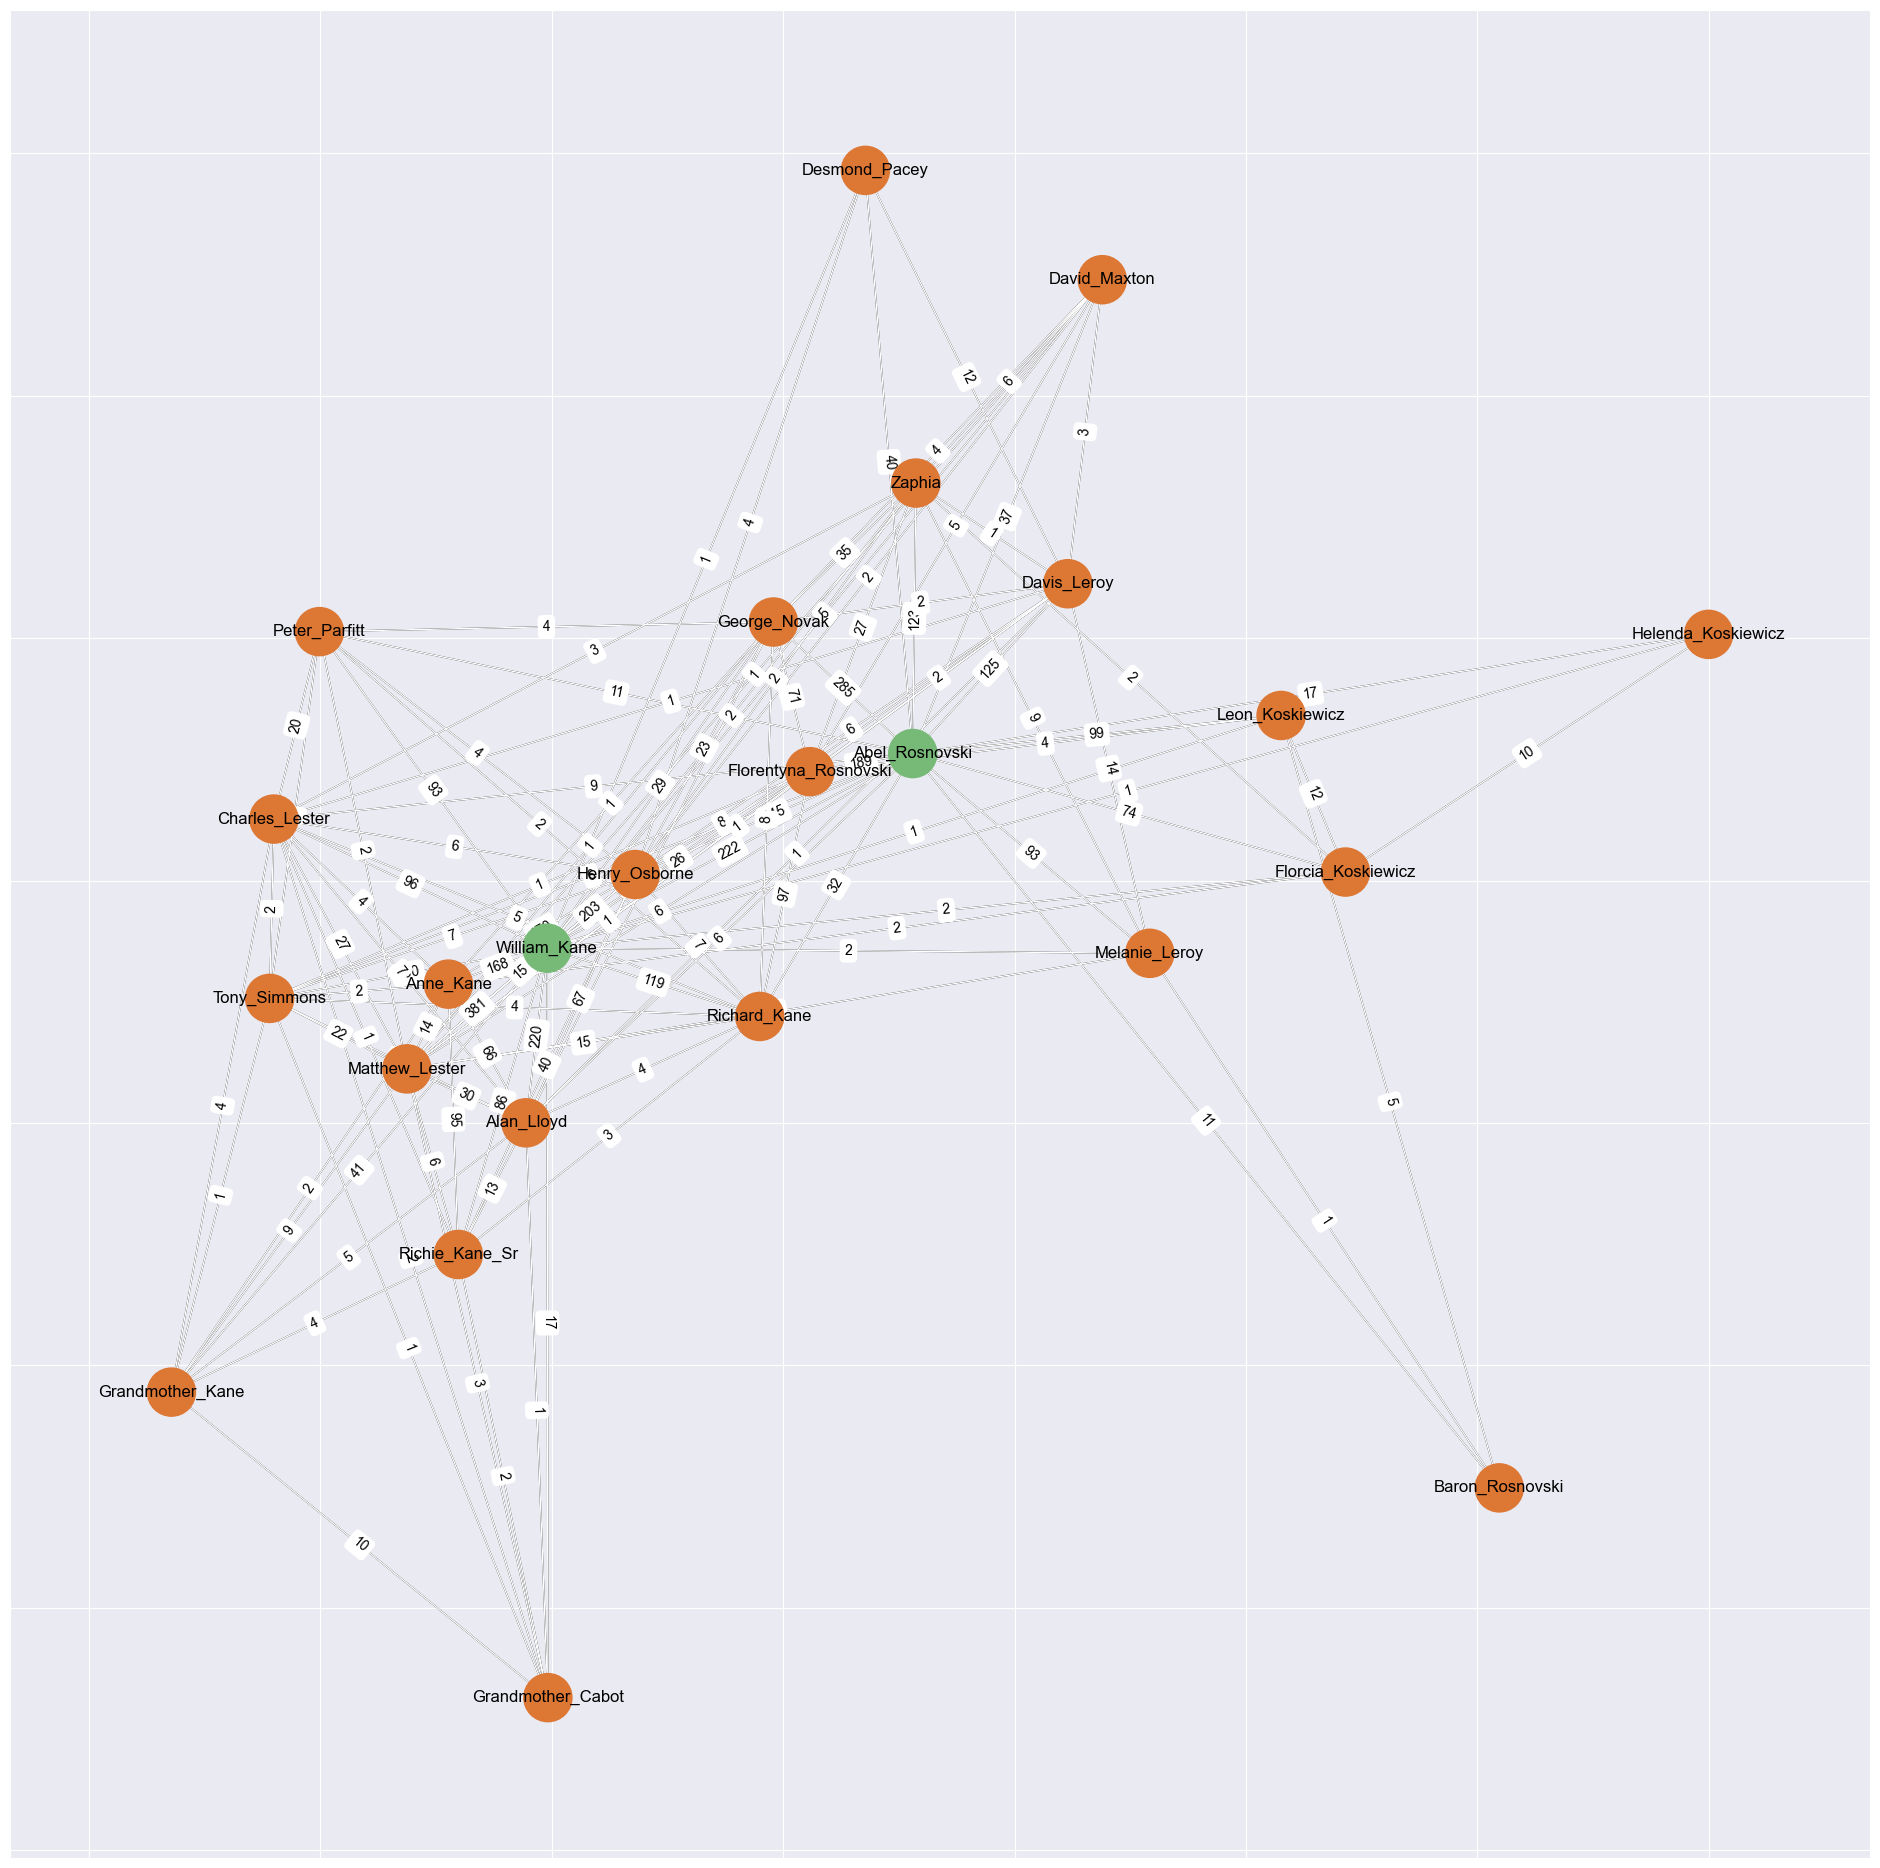

In [73]:
plt.figure(3, figsize=(24,24))
pos = nx.fruchterman_reingold_layout(G, k=2)

main_char = ["William_Kane", "Abel_Rosnovski"]
node_colors = ['#77BA77' if entry in main_char else  '#DD7734' for entry in char_df]

nx.draw_networkx(G, pos=pos, node_size = 1200, font_size=12, node_color=node_colors)
nx.draw_networkx_edges(G, pos=pos, edge_color='#FFFFFF', width=1)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10)
plt.show()

### c. Centrality Analysis

#### 1. Degree Centrality

In [74]:
list(G.edges(data=True))

[('William_Kane', 'Anne_Kane', {'weight': 168}),
 ('William_Kane', 'Henry_Osborne', {'weight': 203}),
 ('William_Kane', 'Matthew_Lester', {'weight': 381}),
 ('William_Kane', 'Abel_Rosnovski', {'weight': 222}),
 ('William_Kane', 'Florcia_Koskiewicz', {'weight': 2}),
 ('William_Kane', 'Davis_Leroy', {'weight': 10}),
 ('William_Kane', 'George_Novak', {'weight': 29}),
 ('William_Kane', 'Zaphia', {'weight': 2}),
 ('William_Kane', 'Florentyna_Rosnovski', {'weight': 26}),
 ('William_Kane', 'Richard_Kane', {'weight': 119}),
 ('William_Kane', 'Helenda_Koskiewicz', {'weight': 1}),
 ('William_Kane', 'Alan_Lloyd', {'weight': 220}),
 ('William_Kane', 'Desmond_Pacey', {'weight': 1}),
 ('William_Kane', 'Grandmother_Kane', {'weight': 41}),
 ('William_Kane', 'Grandmother_Cabot', {'weight': 17}),
 ('William_Kane', 'Tony_Simmons', {'weight': 190}),
 ('William_Kane', 'Melanie_Leroy', {'weight': 2}),
 ('William_Kane', 'Leon_Koskiewicz', {'weight': 1}),
 ('William_Kane', 'David_Maxton', {'weight': 5}),
 ('W

In [75]:
from operator import itemgetter

degc = nx.degree_centrality(G)
degc_list = sorted(degc.items(), key=itemgetter(1), reverse=True)

In [76]:
degc_list

[('William_Kane', 0.9565217391304348),
 ('Abel_Rosnovski', 0.8260869565217391),
 ('Matthew_Lester', 0.7391304347826086),
 ('Henry_Osborne', 0.6956521739130435),
 ('Charles_Lester', 0.6086956521739131),
 ('Alan_Lloyd', 0.5652173913043478),
 ('Davis_Leroy', 0.5217391304347826),
 ('George_Novak', 0.5217391304347826),
 ('Tony_Simmons', 0.5217391304347826),
 ('Florentyna_Rosnovski', 0.4782608695652174),
 ('Richard_Kane', 0.4782608695652174),
 ('Anne_Kane', 0.43478260869565216),
 ('Zaphia', 0.43478260869565216),
 ('Richie_Kane_Sr', 0.3913043478260869),
 ('Grandmother_Kane', 0.34782608695652173),
 ('David_Maxton', 0.34782608695652173),
 ('Peter_Parfitt', 0.34782608695652173),
 ('Grandmother_Cabot', 0.30434782608695654),
 ('Florcia_Koskiewicz', 0.2608695652173913),
 ('Melanie_Leroy', 0.2608695652173913),
 ('Leon_Koskiewicz', 0.21739130434782608),
 ('Desmond_Pacey', 0.17391304347826086),
 ('Baron_Rosnovski', 0.13043478260869565),
 ('Helenda_Koskiewicz', 0.13043478260869565)]

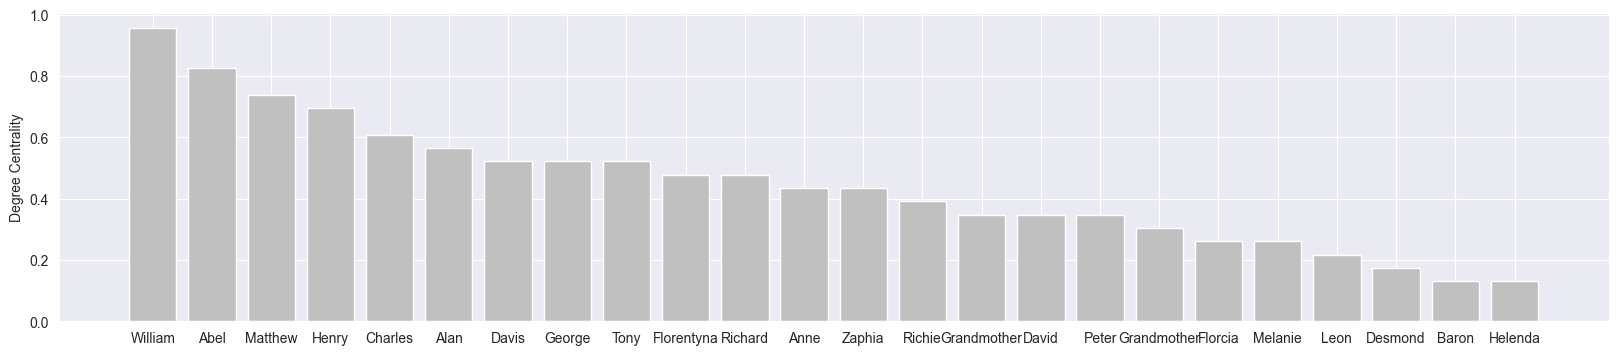

In [77]:
people = list(zip(*degc_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*degc_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='silver')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### 2. Betweenness Centrality

In [78]:
bet = nx.betweenness_centrality(G)
betw_list = sorted(bet.items(), key=itemgetter(1), reverse=True)

In [79]:
betw_list

[('William_Kane', 0.19204780726519857),
 ('Abel_Rosnovski', 0.15905640253466338),
 ('Matthew_Lester', 0.05572808833678398),
 ('Henry_Osborne', 0.038920258485475874),
 ('Charles_Lester', 0.02699040090344438),
 ('Davis_Leroy', 0.016974088713219142),
 ('Alan_Lloyd', 0.016812535290796158),
 ('Tony_Simmons', 0.01509975531714662),
 ('Florentyna_Rosnovski', 0.015046427002948743),
 ('Anne_Kane', 0.014354727398205659),
 ('Zaphia', 0.013405797101449275),
 ('George_Novak', 0.012565091912917999),
 ('Melanie_Leroy', 0.011198945981554678),
 ('Florcia_Koskiewicz', 0.009519104084321474),
 ('Leon_Koskiewicz', 0.008344312692138776),
 ('Richard_Kane', 0.006855825334086203),
 ('Richie_Kane_Sr', 0.0035996612083568596),
 ('Baron_Rosnovski', 0.0013175230566534913),
 ('Grandmother_Kane', 0.0010038270907836125),
 ('Peter_Parfitt', 0.0008344312692138777),
 ('Grandmother_Cabot', 0.00043917435221783044),
 ('David_Maxton', 0.00043917435221783044),
 ('Helenda_Koskiewicz', 0.0),
 ('Desmond_Pacey', 0.0)]

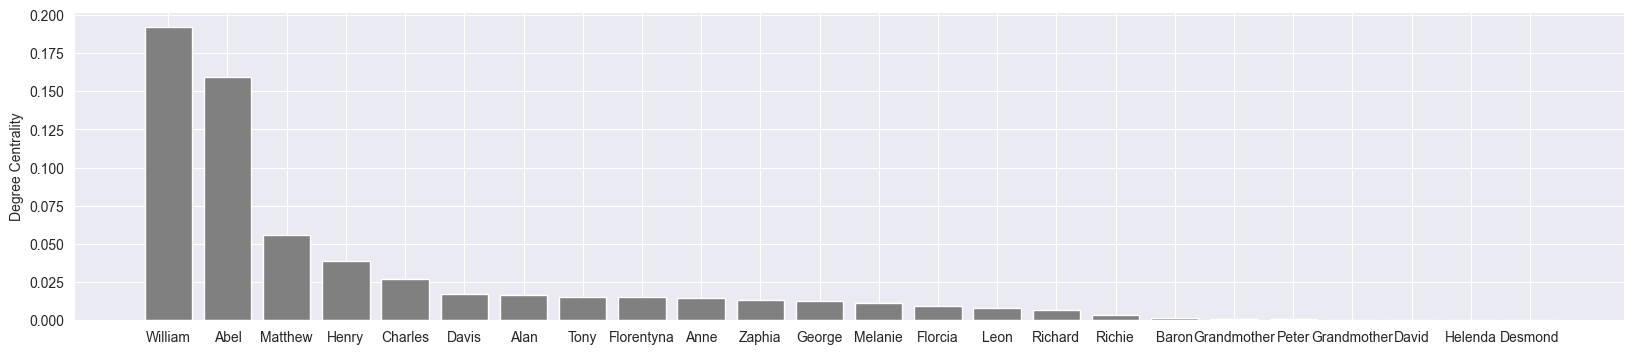

In [80]:
people = list(zip(*betw_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*betw_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='gray')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### 3. Closeness Centrality

In [81]:
clos = nx.closeness_centrality(G)
clos_list = sorted(clos.items(), key=itemgetter(1), reverse=True)

In [82]:
clos_list

[('William_Kane', 0.9583333333333334),
 ('Abel_Rosnovski', 0.8518518518518519),
 ('Matthew_Lester', 0.7931034482758621),
 ('Henry_Osborne', 0.7666666666666667),
 ('Charles_Lester', 0.71875),
 ('Alan_Lloyd', 0.696969696969697),
 ('Davis_Leroy', 0.6764705882352942),
 ('George_Novak', 0.6764705882352942),
 ('Tony_Simmons', 0.6764705882352942),
 ('Florentyna_Rosnovski', 0.6571428571428571),
 ('Richard_Kane', 0.6571428571428571),
 ('Zaphia', 0.6388888888888888),
 ('Anne_Kane', 0.6216216216216216),
 ('David_Maxton', 0.6052631578947368),
 ('Peter_Parfitt', 0.6052631578947368),
 ('Richie_Kane_Sr', 0.6052631578947368),
 ('Grandmother_Kane', 0.5897435897435898),
 ('Florcia_Koskiewicz', 0.575),
 ('Grandmother_Cabot', 0.575),
 ('Melanie_Leroy', 0.575),
 ('Leon_Koskiewicz', 0.5609756097560976),
 ('Desmond_Pacey', 0.5476190476190477),
 ('Helenda_Koskiewicz', 0.5348837209302325),
 ('Baron_Rosnovski', 0.48936170212765956)]

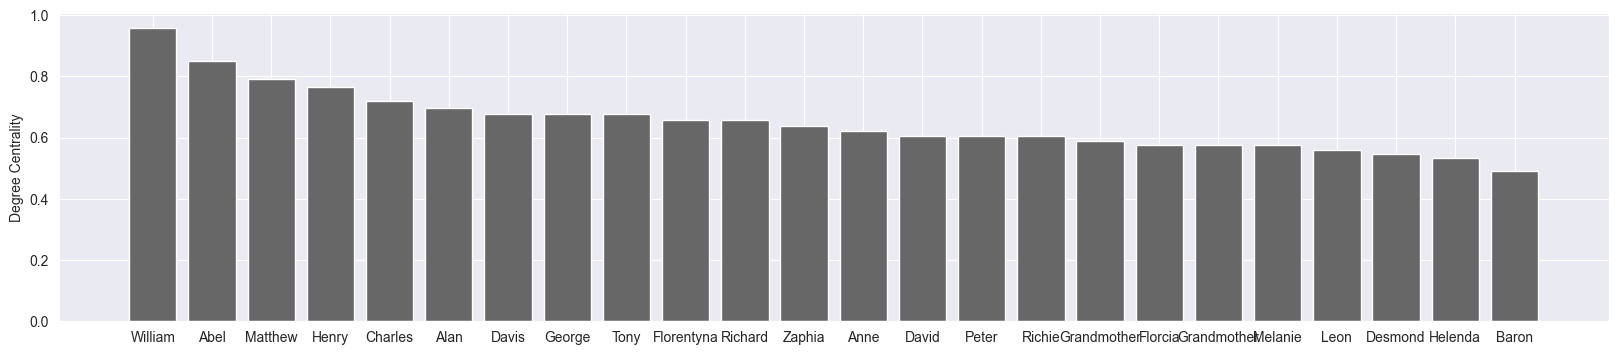

In [83]:
people = list(zip(*clos_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*clos_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='#676767')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### 4. PageRank Centrality

In [84]:
pgr=nx.pagerank(G)
pgr_list = sorted(pgr.items(), key=itemgetter(1), reverse=True)

In [85]:
pgr_list

[('William_Kane', 0.1879556167893361),
 ('Abel_Rosnovski', 0.17929918410742113),
 ('Henry_Osborne', 0.07006932101999798),
 ('Matthew_Lester', 0.05367900723230739),
 ('George_Novak', 0.052221326335311805),
 ('Anne_Kane', 0.0517254299395331),
 ('Florentyna_Rosnovski', 0.04878304446911283),
 ('Alan_Lloyd', 0.04523072409378239),
 ('Richard_Kane', 0.03308317254556843),
 ('Tony_Simmons', 0.02948543480544541),
 ('Richie_Kane_Sr', 0.027886404879227458),
 ('Zaphia', 0.027742601623544562),
 ('Davis_Leroy', 0.02535092273601429),
 ('Charles_Lester', 0.023482009408061826),
 ('Leon_Koskiewicz', 0.020512202255128537),
 ('Melanie_Leroy', 0.01896662721306199),
 ('Peter_Parfitt', 0.01887401854602349),
 ('Florcia_Koskiewicz', 0.018822739089722883),
 ('Grandmother_Kane', 0.014316679739082043),
 ('David_Maxton', 0.012505789868610867),
 ('Desmond_Pacey', 0.012106699331199716),
 ('Grandmother_Cabot', 0.010106135697659818),
 ('Helenda_Koskiewicz', 0.009595440109397481),
 ('Baron_Rosnovski', 0.0081994681654482

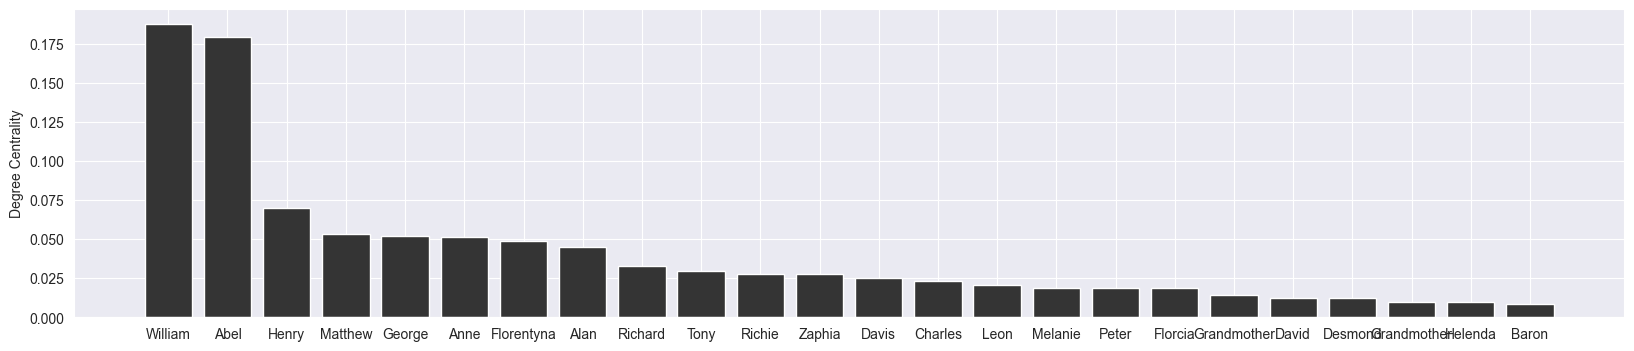

In [86]:
people = list(zip(*pgr_list))[0]
people_first = [i.split("_")[0] for i in people]
score = list(zip(*pgr_list))[1]
x_pos = np.arange(len(people))
plt.figure(figsize=(20, 4))
plt.bar(x_pos, score,align='center', color ='#343434')
plt.xticks(x_pos, people_first)
plt.ylabel('Degree Centrality')
plt.show()

#### Comparing the centrality measures

In [87]:
import pandas as pd
import seaborn as sns
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'page rank': pgr,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,page rank
William_Kane,0.956522,0.192048,0.958333,0.187956
Anne_Kane,0.434783,0.014355,0.621622,0.051725
Henry_Osborne,0.695652,0.038920,0.766667,0.070069
Matthew_Lester,0.739130,0.055728,0.793103,0.053679
Abel_Rosnovski,0.826087,0.159056,0.851852,0.179299
Florcia_Koskiewicz,0.260870,0.009519,0.575000,0.018823
Davis_Leroy,0.521739,0.016974,0.676471,0.025351
George_Novak,0.521739,0.012565,0.676471,0.052221
Zaphia,0.434783,0.013406,0.638889,0.027743
Florentyna_Rosnovski,0.478261,0.015046,0.657143,0.048783


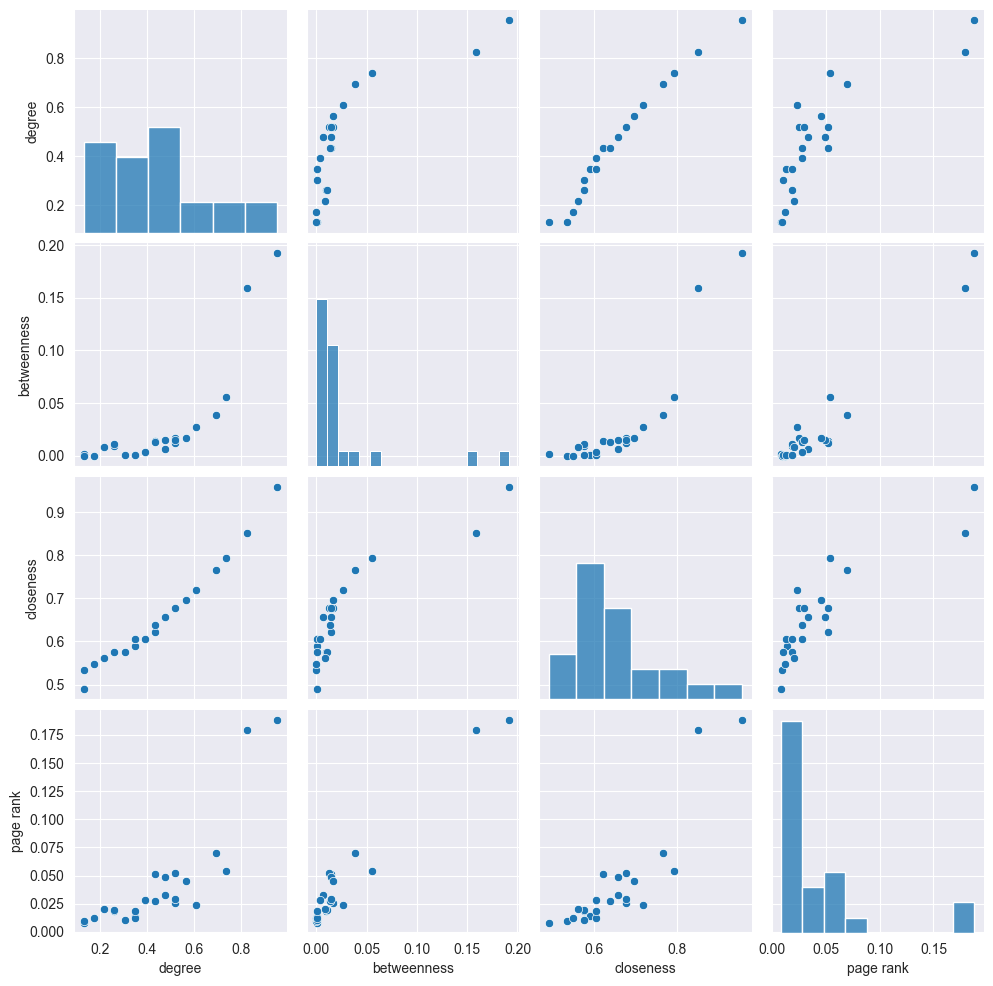

In [88]:
sns.pairplot(centrality)

In [89]:
c_betweenness = list(bet.values())
c_closeness = list(clos.values())
c_degree = list(degc.values())
c_pagerank = list(pgr.values())

Text(0.5, 1.0, 'Betweenness Centrality')

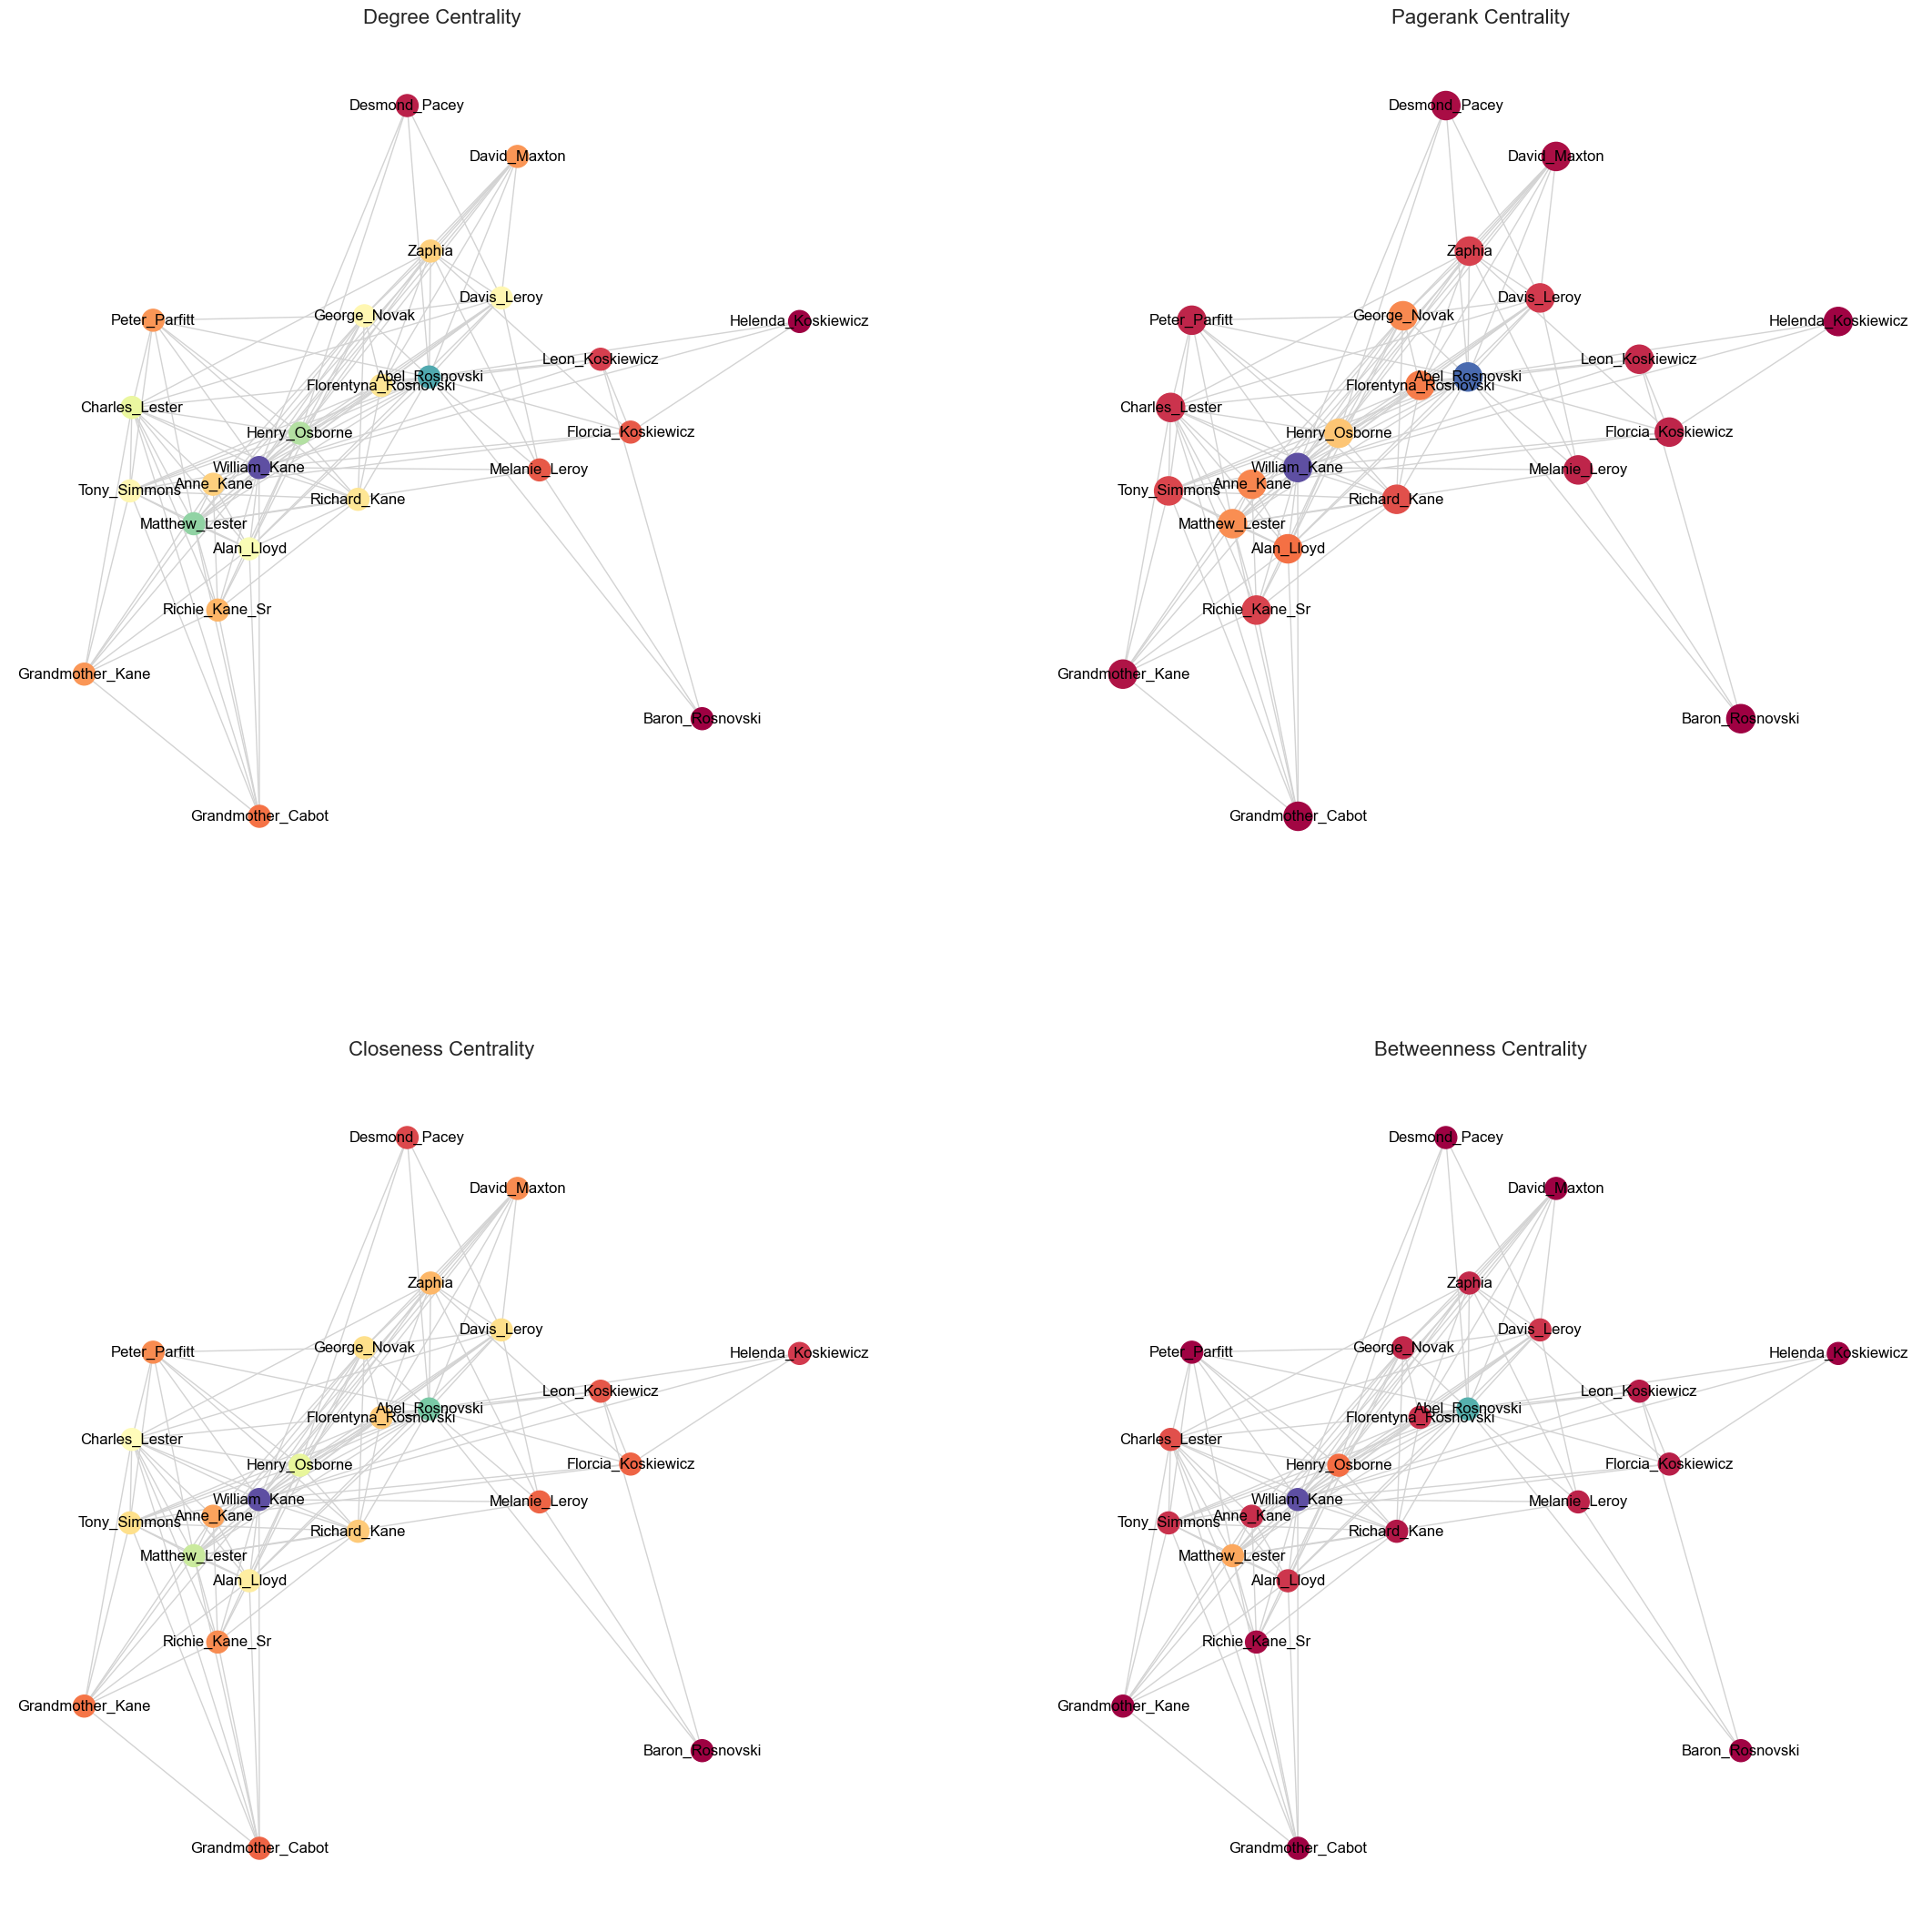

In [90]:
plt.figure(figsize=(27, 27))
# Degree Centrality
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_degree, node_size=300, edge_color='#D3D3D3', pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)
# PageRank Centrality
plt.sca(axarr[0,1])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_pagerank, node_size=500, pos=pos, with_labels=True, edge_color='#D3D3D3', font_size=12)
axarr[0,1].set_title('Pagerank Centrality', size=16)
# Closeness Centrality
plt.sca(axarr[1,0])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_closeness, node_size=300, pos=pos, edge_color='#D3D3D3',with_labels=True)
axarr[1,0].set_title('Closeness Centrality', size=16)
# Betweenness Centrality
plt.sca(axarr[1,1])
nx.draw(G, cmap = plt.get_cmap('Spectral'), node_color = c_betweenness, node_size=300, pos=pos, edge_color='#D3D3D3', with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)

#### Other centrality measures

##### Eigenvector Centrality

In [91]:
eig = nx.eigenvector_centrality(G)
eig_list = sorted(eig.items(), key=itemgetter(1), reverse=True)
eig_list

[('William_Kane', 0.33843305606537144),
 ('Matthew_Lester', 0.3000985095344902),
 ('Abel_Rosnovski', 0.29156665444461066),
 ('Henry_Osborne', 0.29018622314139414),
 ('Charles_Lester', 0.25909249068593543),
 ('Alan_Lloyd', 0.24955591530507681),
 ('George_Novak', 0.23278161167292455),
 ('Tony_Simmons', 0.23107118024753764),
 ('Richard_Kane', 0.2253635438634878),
 ('Davis_Leroy', 0.2231177976220654),
 ('Florentyna_Rosnovski', 0.2096145985269529),
 ('Anne_Kane', 0.1900930468217203),
 ('Zaphia', 0.18154153166159182),
 ('Peter_Parfitt', 0.17737243163399352),
 ('Richie_Kane_Sr', 0.17557110748041477),
 ('David_Maxton', 0.16909118203334722),
 ('Grandmother_Kane', 0.1540623699151269),
 ('Grandmother_Cabot', 0.13968997649293838),
 ('Melanie_Leroy', 0.11240671998185815),
 ('Desmond_Pacey', 0.09351270432217301),
 ('Florcia_Koskiewicz', 0.09326939978714864),
 ('Leon_Koskiewicz', 0.07953685740487865),
 ('Helenda_Koskiewicz', 0.05915741615978932),
 ('Baron_Rosnovski', 0.039547240399070024)]

##### Harmonic Closeness Centrality

In [92]:
#harmonic closeness centrality
har = nx.harmonic_centrality(G)
sorted(har.items(), key=itemgetter(1), reverse=True)

[('William_Kane', 22.5),
 ('Abel_Rosnovski', 21.0),
 ('Matthew_Lester', 20.0),
 ('Henry_Osborne', 19.5),
 ('Charles_Lester', 18.5),
 ('Alan_Lloyd', 18.0),
 ('Davis_Leroy', 17.5),
 ('Tony_Simmons', 17.5),
 ('George_Novak', 17.5),
 ('Florentyna_Rosnovski', 17.0),
 ('Richard_Kane', 17.0),
 ('Zaphia', 16.5),
 ('Anne_Kane', 16.333333333333332),
 ('Richie_Kane_Sr', 15.833333333333334),
 ('Peter_Parfitt', 15.5),
 ('David_Maxton', 15.5),
 ('Grandmother_Kane', 15.333333333333332),
 ('Grandmother_Cabot', 14.833333333333332),
 ('Florcia_Koskiewicz', 14.5),
 ('Melanie_Leroy', 14.5),
 ('Leon_Koskiewicz', 14.0),
 ('Desmond_Pacey', 13.5),
 ('Helenda_Koskiewicz', 13.0),
 ('Baron_Rosnovski', 12.333333333333334)]

#### Centrality Scatter Plot

In [93]:
#Centrality scatter plot
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

In [94]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [95]:
from scipy.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coeff deg and betweenness: PearsonRResult(statistic=0.7915929473693128, pvalue=4.0806790700453945e-06)

 Pearson Correlation Coeff deg and closeness: PearsonRResult(statistic=0.9829490068633333, pvalue=1.127993463845808e-17)

 Pearson Correlation Coeff betweennness and closeness: PearsonRResult(statistic=0.8683121747813682, pvalue=3.8223705912418895e-08)

 Pearson Correlation Coeff betweennness and eigenvector : PearsonRResult(statistic=0.6452099817285017, pvalue=0.0006631064385409611)


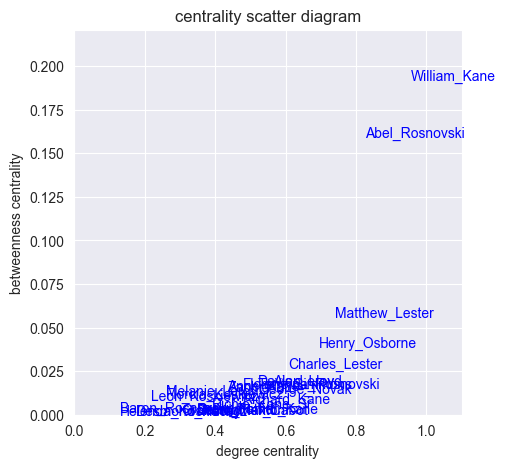

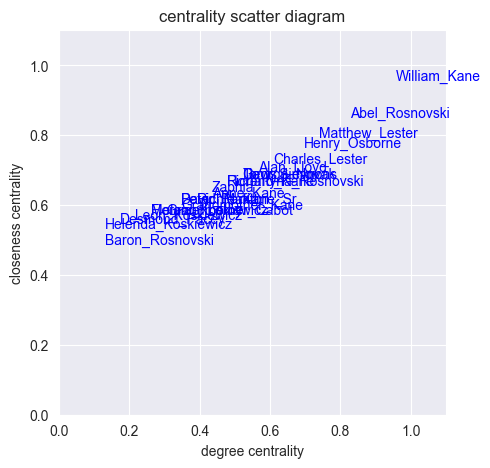

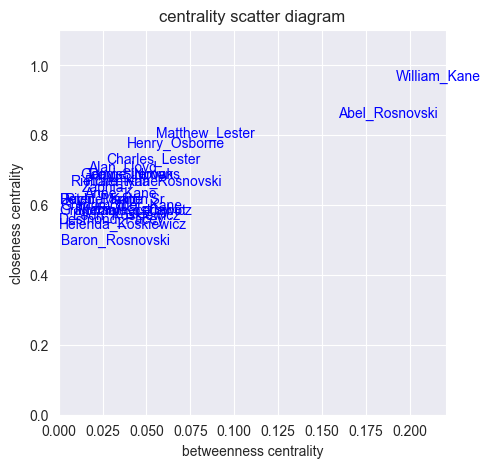

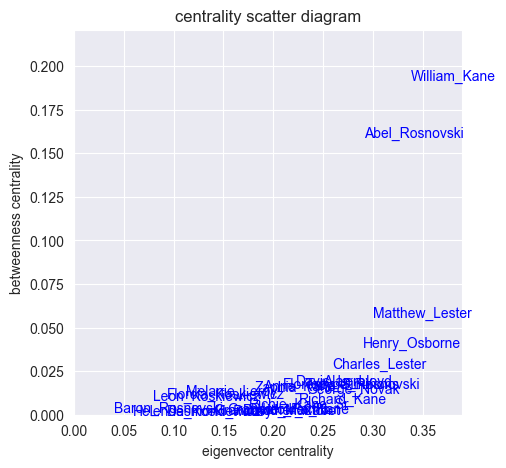

In [96]:
##########################
# Draw centrality scatter
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

### d. Clustering Coefficients

Local Clustering Coefficients

In [97]:
print(nx.transitivity(G))

0.6262341325811002


In [98]:
d = nx.clustering(G)
dsorted = {k: v for k, v in sorted(d.items(), key = lambda item: item[1], reverse=True)}

In [99]:
dsorted

{'Helenda_Koskiewicz': 1.0,
 'Desmond_Pacey': 1.0,
 'David_Maxton': 0.9642857142857143,
 'Grandmother_Cabot': 0.9523809523809523,
 'Grandmother_Kane': 0.9285714285714286,
 'Peter_Parfitt': 0.9285714285714286,
 'Richie_Kane_Sr': 0.8333333333333334,
 'Richard_Kane': 0.8,
 'Alan_Lloyd': 0.717948717948718,
 'George_Novak': 0.7121212121212122,
 'Tony_Simmons': 0.7121212121212122,
 'Florentyna_Rosnovski': 0.7090909090909091,
 'Anne_Kane': 0.6888888888888889,
 'Davis_Leroy': 0.6818181818181818,
 'Zaphia': 0.6666666666666666,
 'Baron_Rosnovski': 0.6666666666666666,
 'Melanie_Leroy': 0.6666666666666666,
 'Charles_Lester': 0.6483516483516484,
 'Henry_Osborne': 0.6166666666666667,
 'Leon_Koskiewicz': 0.6,
 'Matthew_Lester': 0.5808823529411765,
 'Florcia_Koskiewicz': 0.5333333333333333,
 'Abel_Rosnovski': 0.43859649122807015,
 'William_Kane': 0.42424242424242425}

Global Clustering Coefficients

In [100]:
print(nx.average_clustering(G))

0.7279668706623039


### f. Degree distribution, Average Shortest path and size of largest component, generative models

# Community Detection

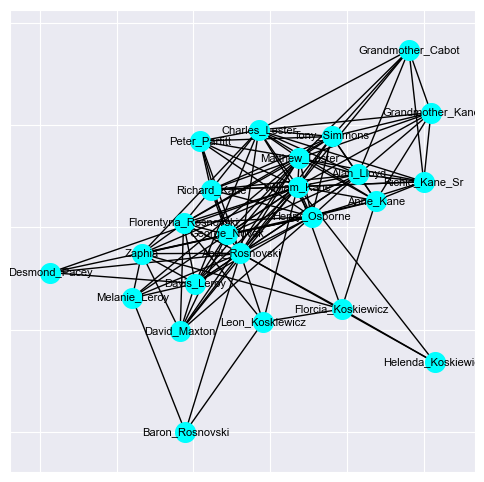

In [101]:
plt.figure(3, figsize=(6,6))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='cyan')

In [102]:
list(nx.find_cliques(G))

[['Baron_Rosnovski', 'Abel_Rosnovski', 'Melanie_Leroy'],
 ['Baron_Rosnovski', 'Abel_Rosnovski', 'Leon_Koskiewicz'],
 ['William_Kane', 'Abel_Rosnovski', 'Florcia_Koskiewicz', 'Zaphia'],
 ['William_Kane',
  'Abel_Rosnovski',
  'Florcia_Koskiewicz',
  'Helenda_Koskiewicz'],
 ['William_Kane', 'Abel_Rosnovski', 'Florcia_Koskiewicz', 'Leon_Koskiewicz'],
 ['William_Kane',
  'Abel_Rosnovski',
  'Henry_Osborne',
  'Desmond_Pacey',
  'Davis_Leroy'],
 ['William_Kane',
  'Abel_Rosnovski',
  'Henry_Osborne',
  'Zaphia',
  'Davis_Leroy',
  'George_Novak',
  'Florentyna_Rosnovski',
  'David_Maxton'],
 ['William_Kane',
  'Abel_Rosnovski',
  'Henry_Osborne',
  'Zaphia',
  'Davis_Leroy',
  'Charles_Lester'],
 ['William_Kane',
  'Abel_Rosnovski',
  'Henry_Osborne',
  'Matthew_Lester',
  'George_Novak',
  'Florentyna_Rosnovski',
  'Richard_Kane'],
 ['William_Kane',
  'Abel_Rosnovski',
  'Henry_Osborne',
  'Matthew_Lester',
  'George_Novak',
  'Florentyna_Rosnovski',
  'Davis_Leroy',
  'David_Maxton'],
 ['

In [104]:
synthetic = nx.make_max_clique_graph(G)
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 28), (5, 6), (5, 7), (5, 8), (5

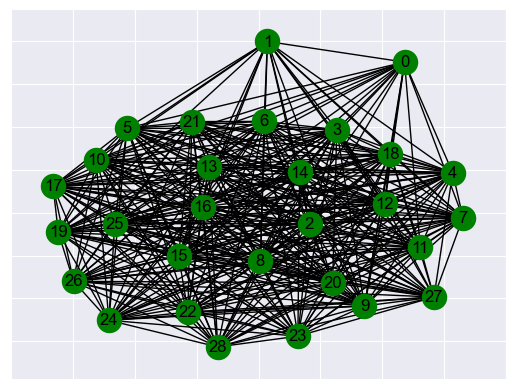

In [105]:
nx.draw_networkx(synthetic,node_color='green')

In [106]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'Florentyna_Rosnovski', 'Florcia_Koskiewicz', 'Charles_Lester', 'Grandmother_Cabot', 'Tony_Simmons', 'Grandmother_Kane', 'Anne_Kane', 'Zaphia', 'Matthew_Lester', 'Henry_Osborne', 'Peter_Parfitt', 'Helenda_Koskiewicz', 'Leon_Koskiewicz', 'Alan_Lloyd', 'George_Novak', 'Richard_Kane', 'Abel_Rosnovski', 'Richie_Kane_Sr', 'William_Kane', 'Baron_Rosnovski', 'Davis_Leroy', 'Melanie_Leroy', 'Desmond_Pacey', 'David_Maxton'})]


In [107]:
print(len(list(c)))

1


In [108]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Abel_Rosnovski',
  'Alan_Lloyd',
  'Anne_Kane',
  'Charles_Lester',
  'David_Maxton',
  'Davis_Leroy',
  'Desmond_Pacey',
  'Florcia_Koskiewicz',
  'Florentyna_Rosnovski',
  'George_Novak',
  'Grandmother_Cabot',
  'Grandmother_Kane',
  'Henry_Osborne',
  'Leon_Koskiewicz',
  'Matthew_Lester',
  'Melanie_Leroy',
  'Peter_Parfitt',
  'Richard_Kane',
  'Richie_Kane_Sr',
  'Tony_Simmons',
  'William_Kane',
  'Zaphia'],
 ['Baron_Rosnovski'],
 ['Helenda_Koskiewicz']]

In [109]:
import pprint
import community.community_louvain as community_louvain
#first compute the best partition
part = community_louvain.best_partition(G, resolution=1.3)
print(part)
communities = {}
for p in part.keys():
    key = part[p]
    if key in communities:
        communities[key].append(p)
    else:
        communities[key] = [p]

from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*communities.values()))

# create dataframe
comm_df = pd.DataFrame(zl, columns=communities.keys())
pprint.pprint(communities)
comm_df

{'William_Kane': 3, 'Anne_Kane': 2, 'Henry_Osborne': 2, 'Matthew_Lester': 3, 'Abel_Rosnovski': 1, 'Florcia_Koskiewicz': 1, 'Davis_Leroy': 1, 'George_Novak': 1, 'Zaphia': 1, 'Florentyna_Rosnovski': 1, 'Richard_Kane': 0, 'Baron_Rosnovski': 1, 'Helenda_Koskiewicz': 1, 'Alan_Lloyd': 3, 'Desmond_Pacey': 1, 'Grandmother_Kane': 3, 'Grandmother_Cabot': 3, 'Tony_Simmons': 3, 'Melanie_Leroy': 1, 'Leon_Koskiewicz': 1, 'David_Maxton': 1, 'Charles_Lester': 3, 'Peter_Parfitt': 3, 'Richie_Kane_Sr': 2}
{0: ['Richard_Kane'],
 1: ['Abel_Rosnovski',
     'Florcia_Koskiewicz',
     'Davis_Leroy',
     'George_Novak',
     'Zaphia',
     'Florentyna_Rosnovski',
     'Baron_Rosnovski',
     'Helenda_Koskiewicz',
     'Desmond_Pacey',
     'Melanie_Leroy',
     'Leon_Koskiewicz',
     'David_Maxton'],
 2: ['Anne_Kane', 'Henry_Osborne', 'Richie_Kane_Sr'],
 3: ['William_Kane',
     'Matthew_Lester',
     'Alan_Lloyd',
     'Grandmother_Kane',
     'Grandmother_Cabot',
     'Tony_Simmons',
     'Charles_Lester'

,3,2,1,0
0,William_Kane,Anne_Kane,Abel_Rosnovski,Richard_Kane
1,Matthew_Lester,Henry_Osborne,Florcia_Koskiewicz,None
2,Alan_Lloyd,Richie_Kane_Sr,Davis_Leroy,None
3,Grandmother_Kane,None,George_Novak,None
4,Grandmother_Cabot,None,Zaphia,None
5,Tony_Simmons,None,Florentyna_Rosnovski,None
6,Charles_Lester,None,Baron_Rosnovski,None
7,Peter_Parfitt,None,Helenda_Koskiewicz,None
8,None,None,Desmond_Pacey,None
9,None,None,Melanie_Leroy,None


In [110]:
print(community_louvain.modularity(part, G))

0.30470187477523186


In [111]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[3, 2, 1, 0]
[(3, 2), (3, 3), (3, 1), (3, 0), (2, 2), (2, 1), (2, 0), (1, 1), (1, 0)]


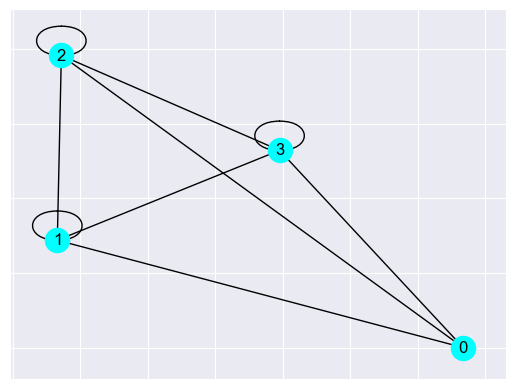

In [112]:
nx.draw_networkx(induced,node_color='cyan')

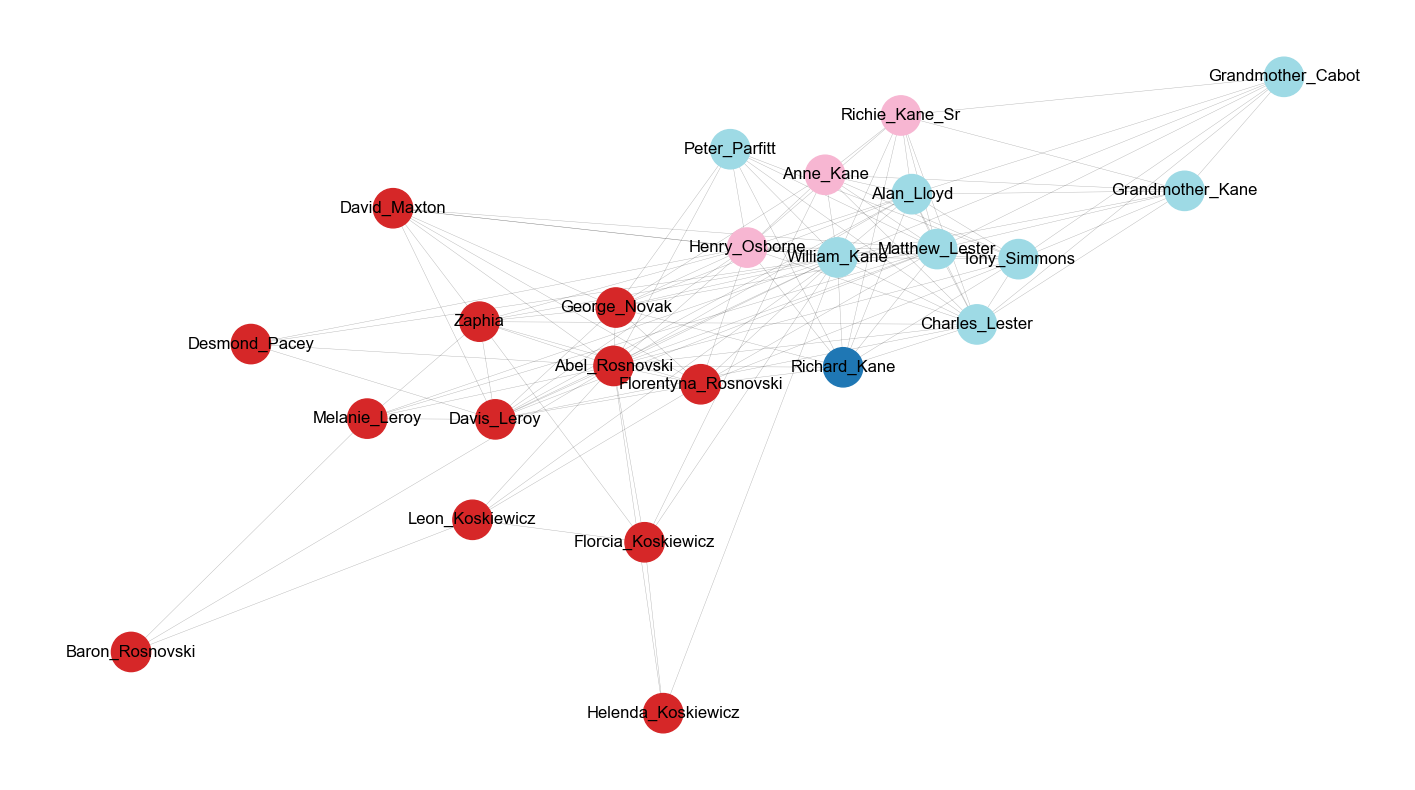

In [113]:
pos = nx.spring_layout(G)
plt.figure(figsize=(18, 10))
plt.axis('off')
# Use matplotlib colormap : https://matplotlib.org/gallery/color/colormap_reference.html
nx.draw_networkx_nodes(G, pos, part.keys(), node_size=800, cmap=plt.cm.tab20, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.3)
nx.draw_networkx_labels(G, pos=pos)
plt.show(G)

# Degree Distribution, Average Shortest path, Largest connected components

## Degree histogram and degree distribution

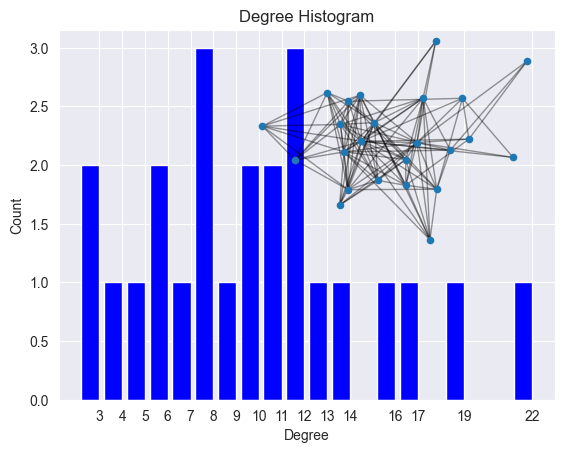

In [114]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

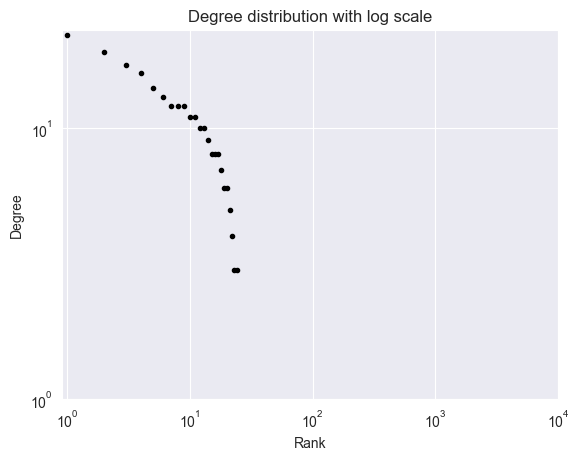

In [115]:
degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)
'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

## Average shortest Path

In [116]:
# Connected Components
list(nx.connected_components(G))

[{'Abel_Rosnovski',
  'Alan_Lloyd',
  'Anne_Kane',
  'Baron_Rosnovski',
  'Charles_Lester',
  'David_Maxton',
  'Davis_Leroy',
  'Desmond_Pacey',
  'Florcia_Koskiewicz',
  'Florentyna_Rosnovski',
  'George_Novak',
  'Grandmother_Cabot',
  'Grandmother_Kane',
  'Helenda_Koskiewicz',
  'Henry_Osborne',
  'Leon_Koskiewicz',
  'Matthew_Lester',
  'Melanie_Leroy',
  'Peter_Parfitt',
  'Richard_Kane',
  'Richie_Kane_Sr',
  'Tony_Simmons',
  'William_Kane',
  'Zaphia'}]

In [117]:
#largest connected component
largest = max(nx.connected_components(G), key=len)
len(largest)

24

### From the above we see that all the characters are connected to each other

This shouldn't come as a surprise to us because although there are two protagonists who lead very different lives in the book, they influence each others lives very significantly

## Average Shortest Paths

In [118]:
print(nx.average_shortest_path_length(G))

1.568840579710145


We notice that the average shortest path length is under 2, this indicates that the characters are not only connected to each other as displayed by the largest connected components, but they are also closely connected with most of them directly interacting with one another

In [ ]:
# Preferential Attachments

preds = nx.preferential_attachment(G)
for u, v, p in preds:
    print('(%s, %s) -> %.8f' % (u, v, p))

## Generative models

G(n,p) and G(n,m)

In [ ]:
Gnp = nx.erdos_renyi_graph(len(G.nodes()), p=0.5)
nx.draw_networkx(Gnp)

In [ ]:
Gnm = nx.gnm_random_graph(len(G.nodes()), len(G.edges))
nx.draw_networkx(Gnm)

## Small World Graph

In [ ]:
Gsw = nx.connected_watts_strogatz_graph(len(G.nodes()), len(G.edges)//len(G.nodes()), 0.8)
nx.draw_networkx(Gsw)

# Section 2: Analysis

#### a. Who are the protagonists as per your analysis? If the 4 centralities are not having high correlation, how do you interpret them?

After analysing all the centrality measures and communities, we can conclusively state that William Lowell Kane and Abel Rosnovski are the two protagonists of the book. This is true as can be inferred from the title of the book (Kane and Abel)

In our case the three centrality measures are strongly correlated to one another and there is no discrepancy to be noted here.

#### b. What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story? How is clustering coefficient related to transitivity of nodes?

We haven't plotted the ego network of the protagonists in Section 1. We thus present the ego networks below and our inferences thereafter

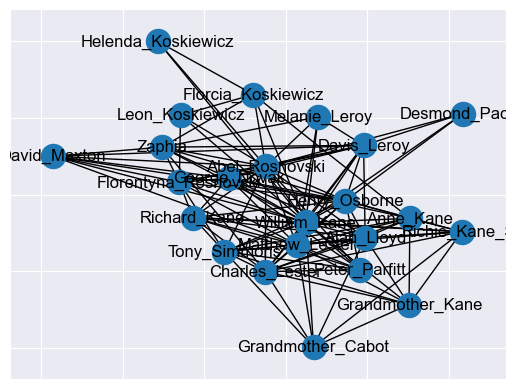

In [119]:
nx.draw_networkx(nx.ego_graph(G, n = "William_Kane"))

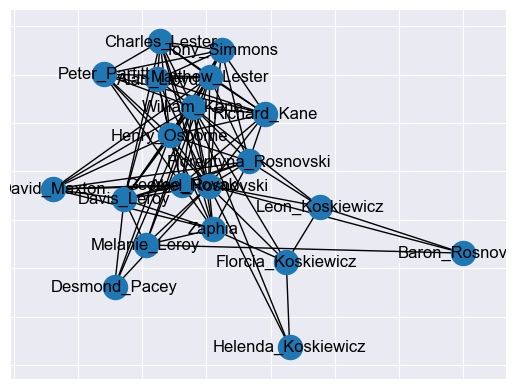

In [120]:
nx.draw_networkx(nx.ego_graph(G, n = "Abel_Rosnovski"))

The graph has a fairly high global clustering coefficient (>0.72) with many nodes having extremely high local clustering coefficients. 
The average shortest path is also quite small (~1.5)

These two factors along with the dense ego networks of both our protagonists indicates that the characters in the book interact very closely with one another.

The presence of 4 communities and the relatively low clustering coefficient of the protagonists (~0.43 for both) tells us that these two characters act as points of contact between different clusters and that they themselves interact between all of the social communities of the book

##### How are the clustering coefficient and transitivity of the nodes connected to each other?

Clustering coefficient and transitivity are closely related. In our case both these values are relatively high (0.72 and 0.62 respectively). This indicates that not only are the nodes well connected to their neighbours' neighbours, but a node's neighbours are well connected amongst themselves

#### c. Compare all the generated graphs (from (f)) to the actual graph. Is there a difference, and if yes, what can it be attributed to? Also, analyze the differences between the 3 generated graph’s attributes.

NameError: name 'G_sw' is not defined